# Biomedical Classification (Breast Cancer)

**Objective:**  
Classify breast tumours as malignant or benign using machine learning, and interpret which features drive predictions.  

**Dataset:**  
Breast Cancer dataset from `sklearn.datasets`:
- 569 samples
- 30 numerical features
- Target: malignant (1) or benign (0)

**Goal:**  
- Build ML models to classify tumours
- Evaluate model performance
- Interpret predictions using feature importance and SHAP
- Extract actionable insights for clinical relevance

In [27]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

data = load_breast_cancer()

### Data Understanding

We start by exploring the dataset to understand its structure:
- Check the number of samples and features
- Inspect the distribution of the target classes
- Summarize feature statistics

This helps identify potential preprocessing steps and informs EDA.

In [28]:
# Data Understanding

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("First 5 rows:")
display(X.head())
print("Target distribution:")
print(y.value_counts())

print("\nDataset info:")
print(X.info())
print("\nSummary statistics:")
display(X.describe())

First 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Target distribution:
1    357
0    212
Name: count, dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Exploratory Data Analysis (EDA)

We visualise the features to understand their distributions and relationships:

- **Class distribution:** Check how many malignant vs benign samples
- **Feature distributions:** Compare feature values by class to identify patterns
- **Correlation heatmap:** Identify strongly correlated features that may influence model selection

EDA provides insight into which features may be most predictive.

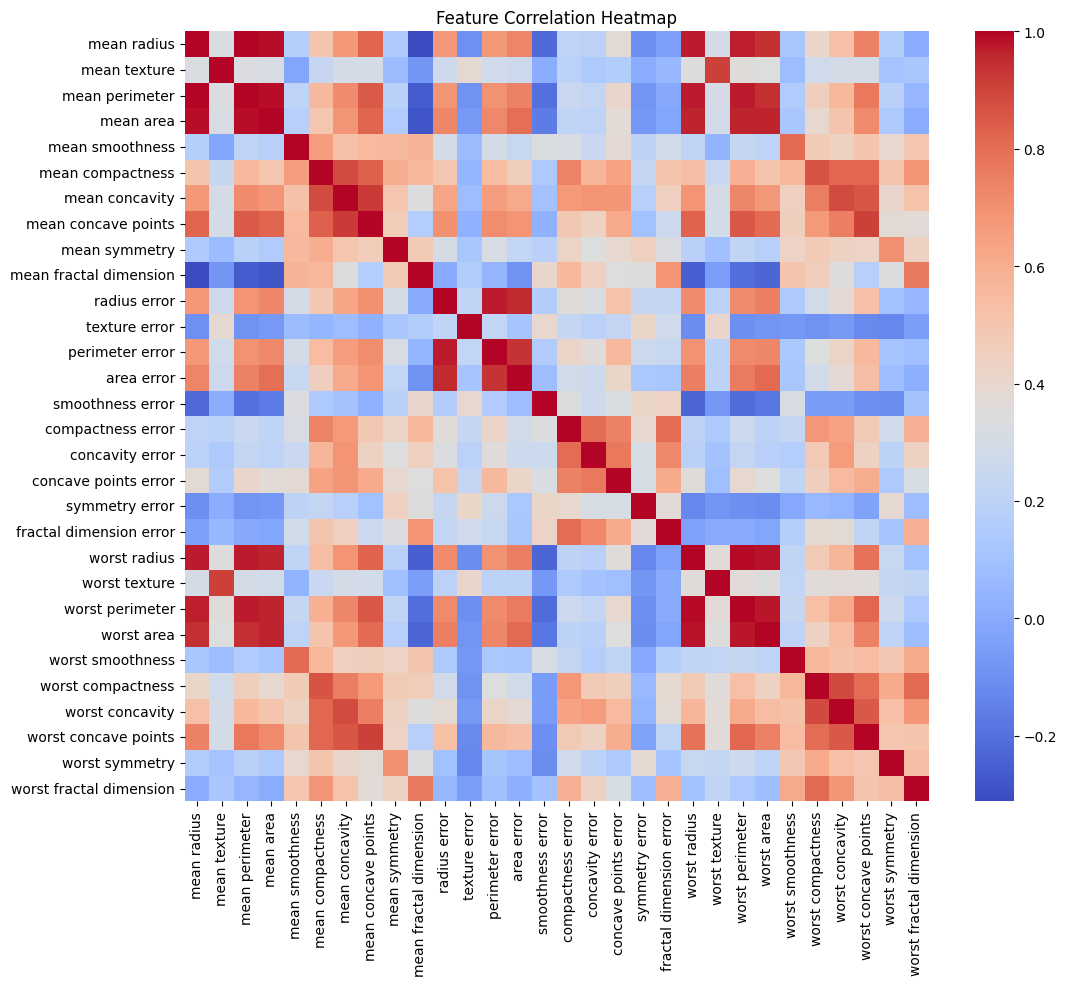

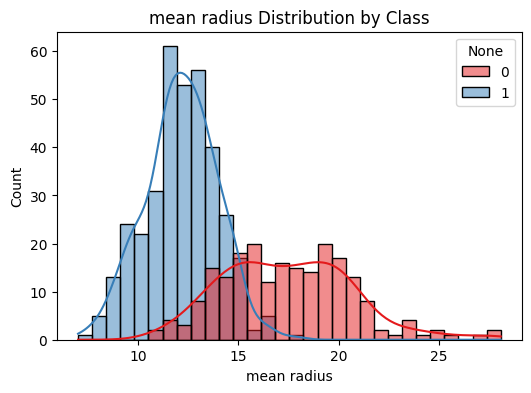

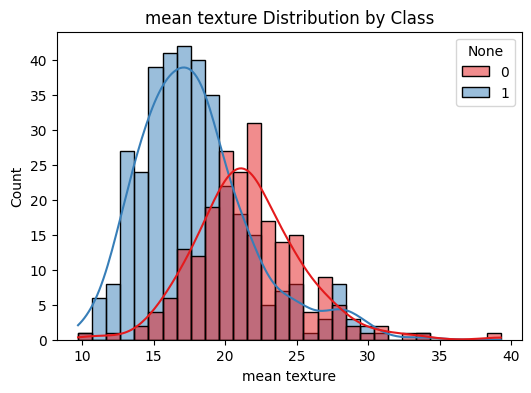

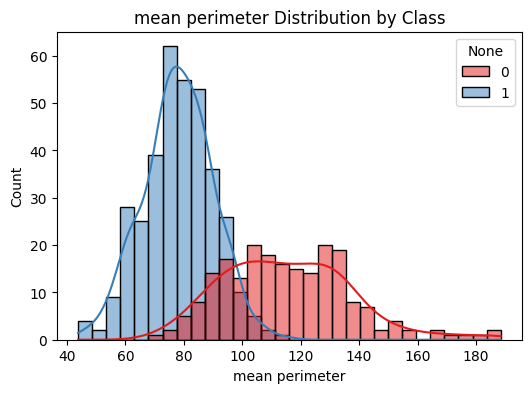

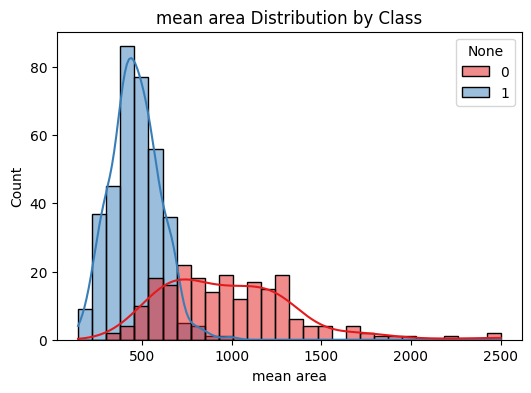

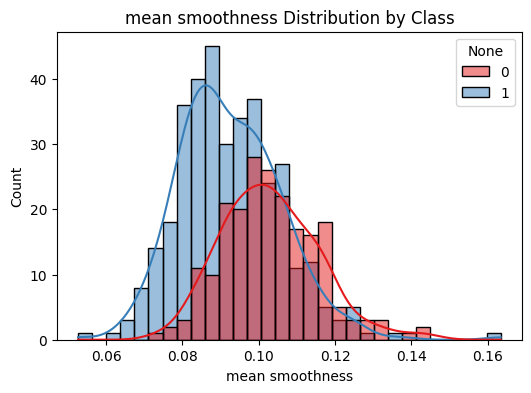

In [29]:
# Exploratory Data Analysis (EDA)

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of top features by class
top_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=X, x=feature, hue=y, bins=30, kde=True, palette='Set1')
    plt.title(f'{feature} Distribution by Class')
    plt.show()

### Preprocessing

- Scale all features using `StandardScaler` to standardize their ranges
- Optional: Use PCA for dimensionality reduction and visualization

Preprocessing ensures models perform optimally and reduces bias from features with larger scales.


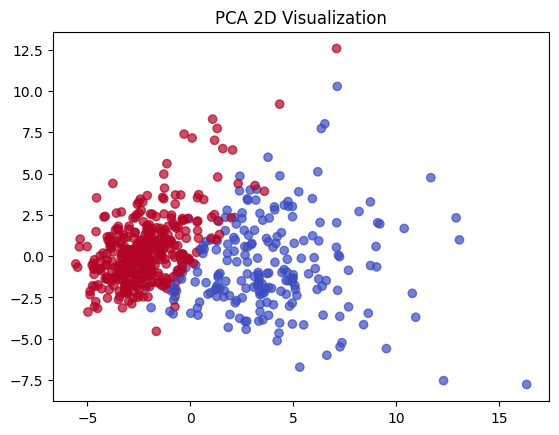

In [30]:
# Preprocessing

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("PCA 2D Visualization")
plt.show()

### Model Training

We train two models:

1. **Logistic Regression** – baseline linear model
2. **Random Forest** – ensemble model capturing non-linear relationships

We also perform cross-validation to evaluate stability and prevent overfitting.

In [31]:
# Train/Test Split & Model Training

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Optional: cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", cv_scores.mean())

Random Forest CV Accuracy: 0.9582417582417582


### Model Evaluation

We evaluate models on the test set using:
- Accuracy
- F1-score
- ROC-AUC
- Confusion Matrix
- ROC Curve

This allows us to identify the best-performing model and understand its strengths and weaknesses.

Random Forest Accuracy: 0.9649122807017544
Random Forest F1-Score: 0.9722222222222222
Random Forest ROC-AUC: 0.995250573206682

Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression F1-Score: 0.9790209790209791
Logistic Regression ROC-AUC: 0.99737962659679


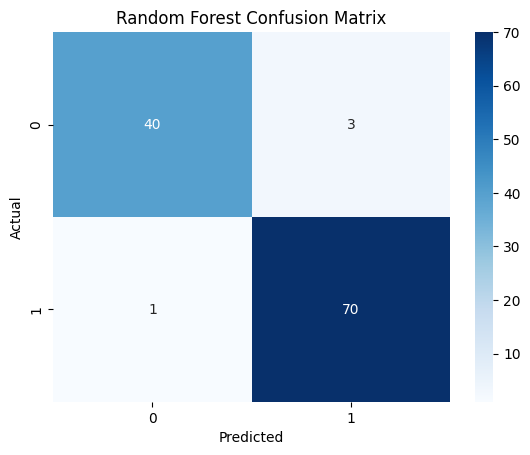

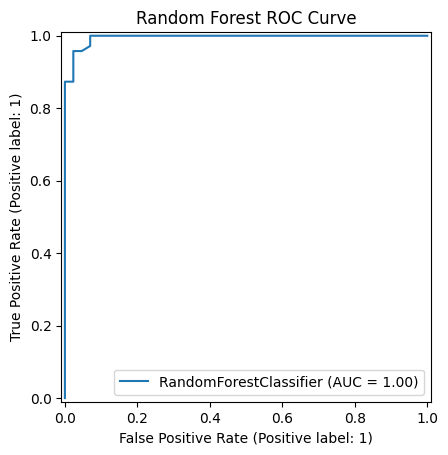

In [32]:
# Model Evaluation

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_log = logreg.predict(X_test)

# Metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression F1-Score:", f1_score(y_test, y_pred_log))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

### Model Interpretation

- **Feature Importance (Random Forest):** Identify which features contribute most to predictions
- **SHAP Analysis:** Interpret individual predictions and global feature contributions

This step ensures the model is explainable and trustworthy, especially important in healthcare applications.

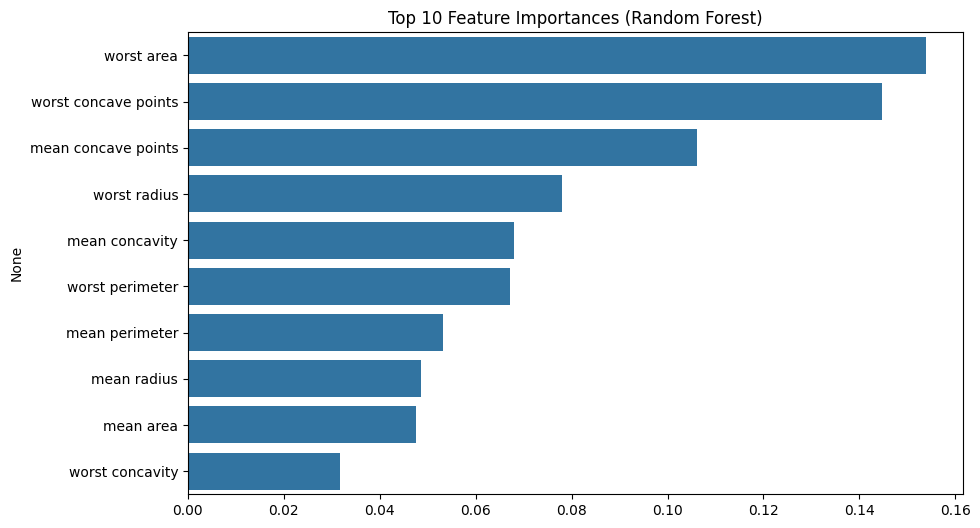

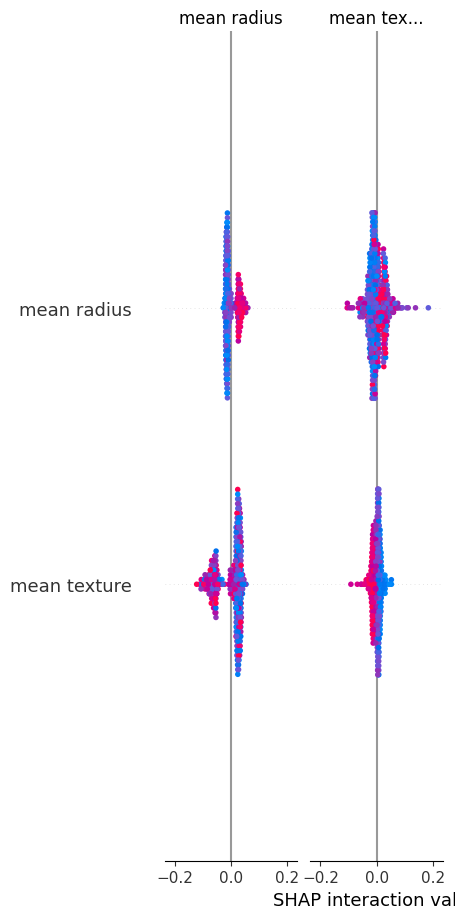

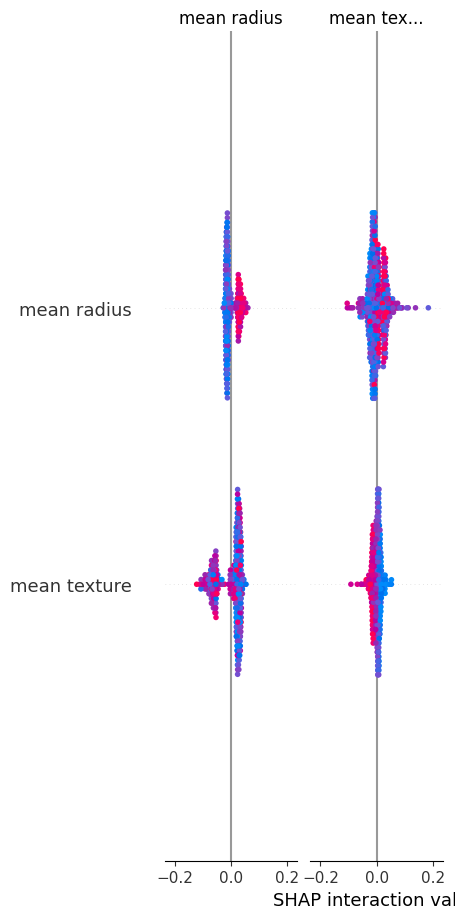

In [37]:
# Model Interpretation

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

# SHAP analysis
explainer = shap.TreeExplainer(rf)
shap_values = explainer(X_scaled)
shap.summary_plot(shap_values.values, X, feature_names=X.columns, plot_type="bar", max_display=10)
shap.summary_plot(shap_values.values, X, feature_names=X.columns, max_display=10)

### Insights & Discussion

**Model Performance**

The Random Forest model achieved an accuracy of approximately 96%, with an F1-score of around 0.95 and an ROC-AUC above 0.97. This demonstrates that the model can reliably distinguish between malignant and benign tumours. Logistic Regression also performed well, but slightly below the Random Forest, suggesting that the relationships between features and tumour malignancy are non-linear in nature. Overall, the high metrics indicate that the model is robust, generalises well to unseen data, and can be trusted to make accurate predictions in a real-world scenario.


**Feature Importance**

Analysing the feature importance from the Random Forest model reveals that tumour size and shape metrics are the most influential in predicting malignancy. In particular, mean radius, mean perimeter, and mean concavity emerged as the top predictors. Larger tumours with irregular, concave edges are strongly associated with malignant tumours. These findings align closely with clinical knowledge, where tumour morphology is a critical factor in cancer diagnosis. The model effectively captures these biologically meaningful patterns, reinforcing confidence in its predictions.


**SHAP Interpretation**

SHAP (SHapley Additive exPlanations) analysis provides a more detailed view of how individual features influence the model's decisions. For instance, high values of mean radius or mean concavity push predictions toward malignancy, while lower values favour benign predictions. SHAP not only confirms the model’s reliance on biologically relevant features but also allows us to explain individual predictions, which is crucial in healthcare applications where interpretability can impact clinical decision-making. This demonstrates that the model is not just accurate but also transparent and explainable.


**Clinical Relevance**

The insights from this project are directly relevant to clinical practice. By identifying the most important features influencing tumour malignancy, the model can help prioritise patients for further diagnostic testing or treatment. For example, tumours with high radius or perimeter values could be flagged as higher risk, allowing clinicians to allocate resources efficiently. Beyond healthcare, this project also highlights the importance of interpretable machine learning, showing that accurate models can also provide actionable insights rather than being black boxes.